# Predicting Churns 

### with Neural Networks(MLPC), Logistic Regression and KNN

---

### About Dataset
Context

The dataset is the details of the customers in a company.
Content

The column are about it's estimated salary, age, sex, etc. Aiming to provide all details about an employee.


https://www.kaggle.com/datasets/shubh0799/churn-modelling

---

#### Let's start!

In [421]:
# importing libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from personalization import GraphCustomizer as gc
from data_analysis import DataAnalysis as da

from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LogisticRegression as lr
from sklearn.neural_network import MLPClassifier as mlpc
from sklearn.neighbors import KNeighborsClassifier as knnc

from sklearn.metrics import plot_confusion_matrix as matrix
from sklearn.metrics import classification_report as cr
from sklearn.datasets import make_classification as mc

import warnings

warnings.filterwarnings("ignore")

#### Data Mining

In [422]:
# reading dataset and analysing it

df = pd.read_csv(r"Churn_Modelling.csv")

In [423]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [424]:
df.shape

(10000, 14)

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [426]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4331,4332,15789714,Semmens,691,Spain,Male,21,3,103000.94,1,1,1,104648.58,0
9125,9126,15604138,Iheanacho,749,Spain,Male,34,2,0.00,1,0,0,174189.04,1
9448,9449,15628274,Ferri,583,Germany,Male,35,8,149995.72,2,1,0,42143.55,0
6355,6356,15570414,Chizoba,618,Spain,Male,41,4,115251.64,1,0,0,136435.75,0
585,586,15718057,Onyinyechukwuka,760,France,Female,51,2,100946.71,1,0,0,179614.80,1
2526,2527,15727919,Chukwuemeka,671,Spain,Female,29,6,0.00,2,0,0,12048.67,0
5863,5864,15778515,Wu,748,France,Male,40,3,95297.11,1,0,0,171515.84,0
730,731,15812750,Ozioma,591,France,Male,24,6,147360.00,1,1,1,25310.82,0
8909,8910,15705085,Quesada,670,Spain,Female,29,9,0.00,2,1,0,27359.19,0
3100,3101,15735549,Lori,810,Germany,Male,35,3,96814.46,2,1,1,120511.03,0


In [427]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [428]:
df.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [429]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [430]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [431]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [432]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [433]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [434]:
da.column_count(df)

Coluna: RowNumber

Contagens:
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: RowNumber, Length: 10000, dtype: int64




Coluna: CustomerId

Contagens:
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64




Coluna: Surname

Contagens:
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64




Coluna: CreditScore

Contagens:
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64




Coluna: Geography

Contagens:
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64




Coluna: Gend

In [435]:
filter_mean_age = df["Age"].mean()
filter_mean_age

38.9218

In [436]:
filter_min_age = df["Age"].min()
filter_min_age

18

In [437]:
filter_max_age = df["Age"].max()
filter_max_age

92

In [438]:
filter_MMM = df.describe().loc[["mean", "min", "max"]]
round(filter_MMM, 2)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
mean,5000.5,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
min,1.0,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
max,10000.0,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


In [439]:
filter_churn = df[df["Exited"] == 1]
filter_churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [440]:
filter_churn_act_member = df[(df["Exited"] == 1) & (df["IsActiveMember"] == 1)]
filter_churn_act_member

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
46,47,15602280,Martin,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
47,48,15771573,Okagbue,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1
90,91,15757535,Heap,647,Spain,Female,44,5,0.00,3,1,1,174205.22,1
104,105,15804919,Dunbabin,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,9935,15774586,West,692,Germany,Female,43,10,118588.83,1,1,1,161241.65,1
9947,9948,15732202,Abramovich,615,France,Male,34,1,83503.11,2,1,1,73124.53,1
9960,9961,15681026,Lucciano,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1


In [441]:
filter_churn_age_mean = filter_churn["Age"].mean()
round(
    filter_churn_age_mean,
)

45

In [442]:
filter_churn_age_mean = filter_churn_act_member["Age"].mean()
round(
    filter_churn_age_mean,
)

45

Com as analises do dataset acima, podemos identificar que existem Churns que ainda estão ativos, media de idade deles é 45 anos, tanto para membros ativos quanto inativos.

#### Data Cleaning

In [443]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [444]:
# rename columns

df = df.rename(columns={"Exited": "Churn"})
df = df.rename(columns={"EstimatedSalary": "Salary"})
df = df.rename(columns={"Geography": "Country"})
df

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [445]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])
df

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


#### Data Visualization

In [446]:
_churn_act_member = df[(df["Churn"] == 1) & (df["IsActiveMember"] == 1)]
_churn_act_member

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
46,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1
47,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1
90,647,Spain,Female,44,5,0.00,3,1,1,174205.22,1
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
...,...,...,...,...,...,...,...,...,...,...,...
9934,692,Germany,Female,43,10,118588.83,1,1,1,161241.65,1
9947,615,France,Male,34,1,83503.11,2,1,1,73124.53,1
9960,795,Germany,Female,33,9,104552.72,1,1,1,120853.83,1
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1


In [447]:
_churn_non_act_member = df[(df["Churn"] == 1) & (df["IsActiveMember"] == 0)]
_churn_non_act_member

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Churn
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
22,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
...,...,...,...,...,...,...,...,...,...,...,...
9962,702,Spain,Male,44,9,0.00,1,0,0,59207.41,1
9975,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


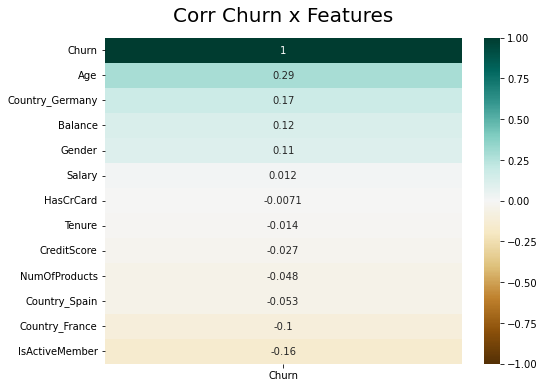

In [471]:
plt.figure(figsize=(8, 6))

corr_by_churn = sns.heatmap(
    df.corr()[["Churn"]].sort_values(by="Churn", ascending=False),
    vmin=-1,
    vmax=1,
    cmap="BrBG",
    annot=True,
)

corr_by_churn.set_title("Corr Churn x Features", fontdict={"fontsize": 20}, pad=16)

plt.show()

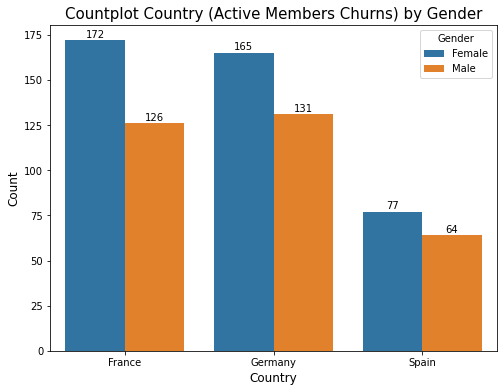

In [448]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x=_churn_act_member["Country"], hue=_churn_act_member["Gender"])

plt.title("Countplot Country (Active Members Churns) by Gender", fontsize=15)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)
gc.annotate_graph(ax)

plt.show()

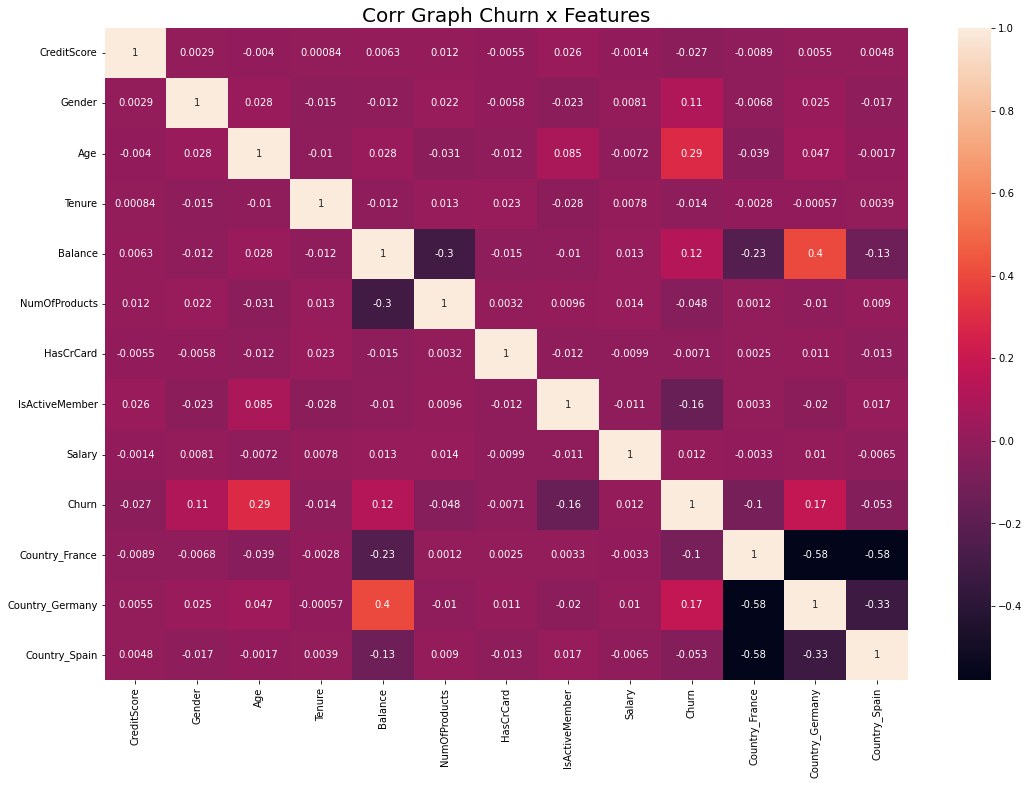

In [474]:
plt.figure(figsize=(18, 12))

sns.heatmap(df.corr(), annot=True)

plt.title("Corr Graph Churn x Features", fontsize=20)

plt.show()

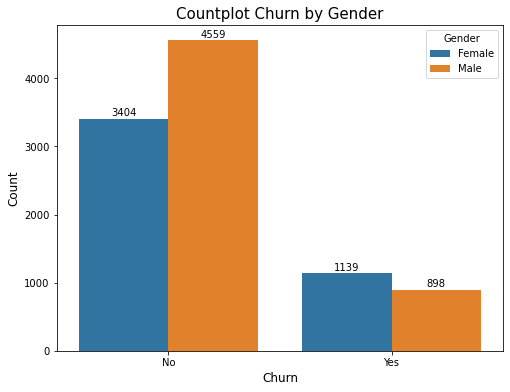

In [449]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x=df["Churn"], hue=df["Gender"])

plt.title("Countplot Churn by Gender", fontsize=15)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Count", fontsize=12)
gc.annotate_graph(ax)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])

plt.show()

In [450]:
real_churn = _churn_non_act_member
real_churn

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Churn
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
22,510,Spain,Female,38,4,0.00,1,1,0,118913.53,1
...,...,...,...,...,...,...,...,...,...,...,...
9962,702,Spain,Male,44,9,0.00,1,0,0,59207.41,1
9975,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1


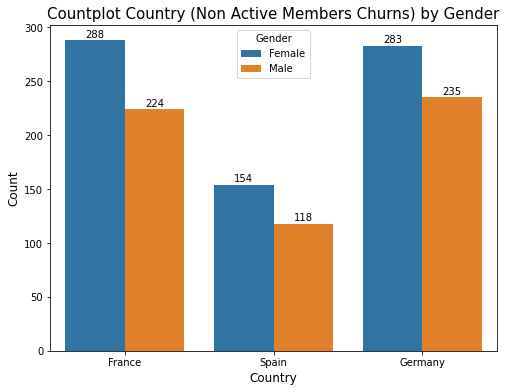

In [451]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x=real_churn["Country"], hue=real_churn["Gender"])

plt.title("Countplot Country (Non Active Members Churns) by Gender", fontsize=15)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)
gc.annotate_graph(ax)

plt.show()

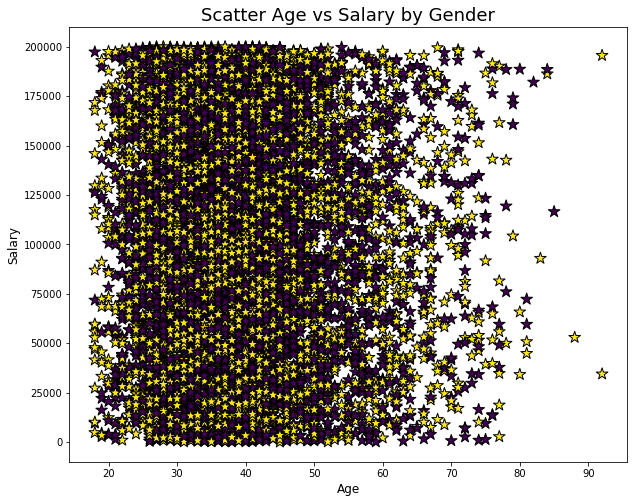

In [452]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(
    df["Age"],
    df["Salary"],
    c=[1 if s == "Male" else 0 for s in df.Gender],
    s=150,
    marker="*",
    edgecolors="k",
)

plt.title("Scatter Age vs Salary by Gender", fontsize=18)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Salary", fontsize=12)


plt.show()

## Machine Learning and Neural Networks

#### GetDummies and Gender modification

In [453]:
df["Gender"] = df["Gender"].apply(lambda x: 0 if (x == "Male") else 1)
df

,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Churn
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [454]:
df = pd.get_dummies(df, columns=["Country"])
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Churn,Country_France,Country_Germany,Country_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


#### Split train and test label

In [455]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

x_train, x_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=10)

In [456]:
ss = ss()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#### Using Logistic Regressor

In [457]:
# without data scaled

lr = lr()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)

print(cr(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      7783
           1       0.05      0.40      0.09       217

    accuracy                           0.79      8000
   macro avg       0.52      0.60      0.49      8000
weighted avg       0.95      0.79      0.86      8000



In [458]:
# with data scaled

# lr = lr()
lr.fit(x_train_scaled, y_train)

y_pred = lr.predict(x_train_scaled)

print(cr(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      7406
           1       0.22      0.60      0.32       594

    accuracy                           0.81      8000
   macro avg       0.59      0.71      0.61      8000
weighted avg       0.91      0.81      0.85      8000



#### Using MLPClassifier

In [459]:
mlpc = mlpc(hidden_layer_sizes=(5,), random_state=42, max_iter=2000)

mlpc.fit(x_train, y_train)

y_pred = mlpc.predict(x_train)

print(cr(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      8000
           1       0.00      0.00      0.00         0

    accuracy                           0.80      8000
   macro avg       0.50      0.40      0.44      8000
weighted avg       1.00      0.80      0.89      8000



#### Using KNNC

------------------------------
Metricas - KNeighborsClassifier
------------------------------
Score: 84.0%


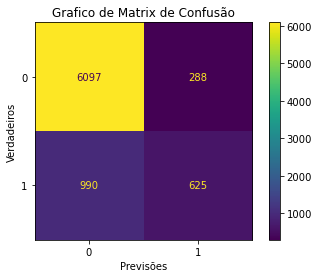

In [469]:
knn = knnc(n_neighbors=3)
knn.fit(x_train, y_train)
score = knn.score(x_train, y_train)

print("-" * 30)
print("Metricas - KNeighborsClassifier")
print("-" * 30)

print(f"Score: {round(score, 2):.1%}")
matrix(knn, x_train, y_train)
plt.title("Grafico de Matrix de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Verdadeiros")
plt.show()

------------------------------
Metricas - KNeighborsClassifier
------------------------------
Score: 90.0%


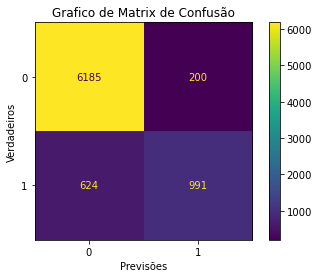

In [468]:
knn = knnc(n_neighbors=3)
knn.fit(x_train_scaled, y_train)
score = knn.score(x_train_scaled, y_train)

print("-" * 30)
print("Metricas - KNeighborsClassifier")
print("-" * 30)

print(f"Score: {round(score, 2):.1%}")

matrix(knn, x_train_scaled, y_train)
plt.title("Grafico de Matrix de Confusão")
plt.xlabel("Previsões")
plt.ylabel("Verdadeiros")
plt.show()